# скрипт #02
<hr>

# страндарные библиотеки для работы

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.display import HTML

# импорт сырых даных из CSV

In [18]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths/'
bathNumber=['1001','1003','1004','1005','1006']

In [5]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [74]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])

<hr>

# общая статистика по данным в наборах

In [75]:
for i in range(5):
    print("Ванна ", bathNumber[i])
    display(HTML(data[i][ data[i].columns[0:10] ].describe().to_html()))
    display(HTML(data[i][ data[i].columns[10:20] ].describe().to_html()))
    display(HTML(data[i][ data[i].columns[20:] ].describe().to_html()))
    print('\n')

Ванна  1001




Ванна  1003




Ванна  1004




Ванна  1005




Ванна  1006


<hr>

# Гистограммы

In [76]:
paramNames=data[0].columns

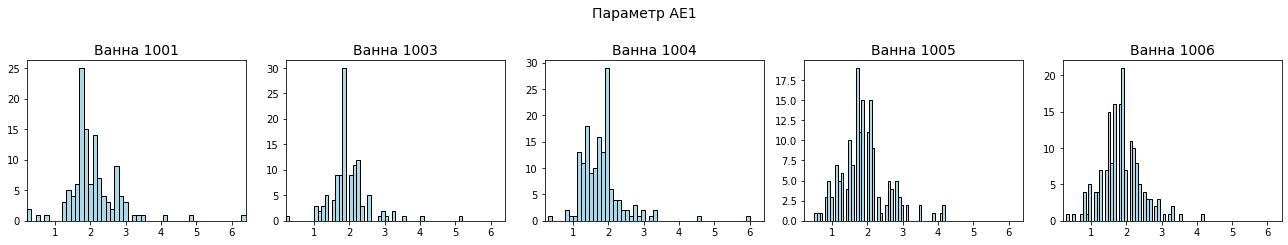

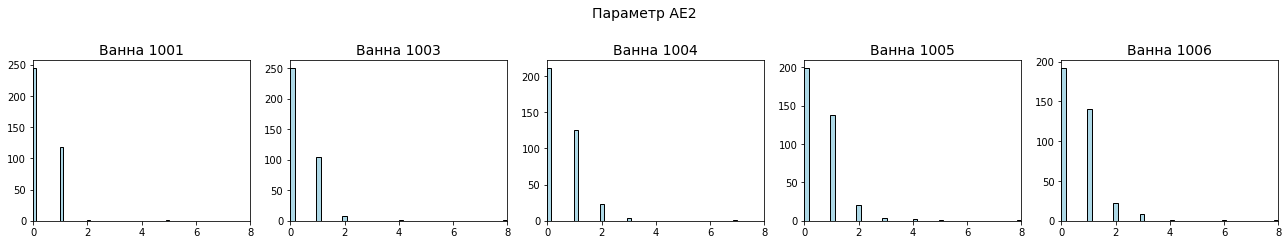

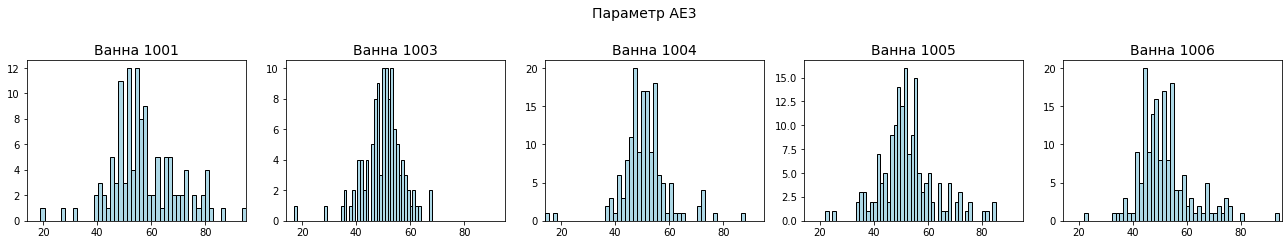

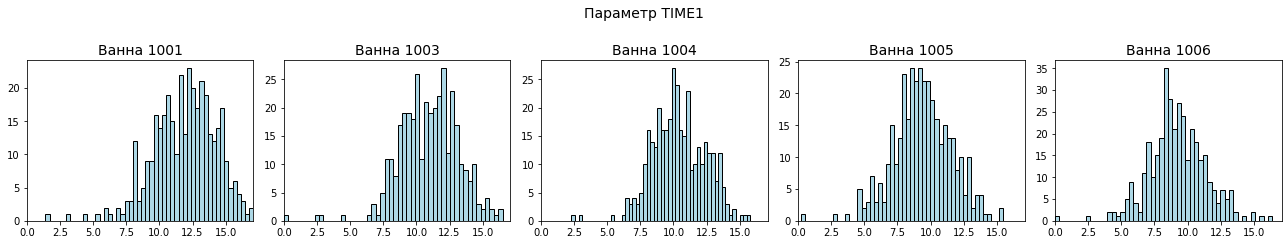

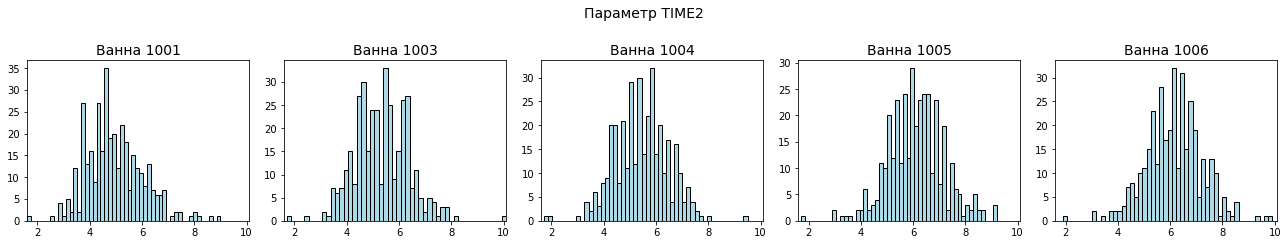

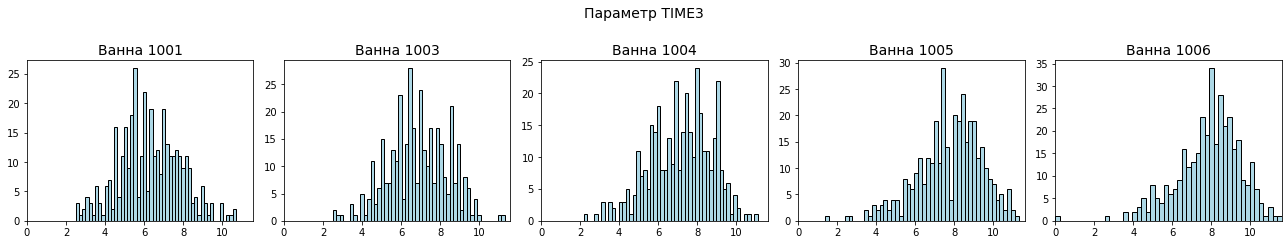

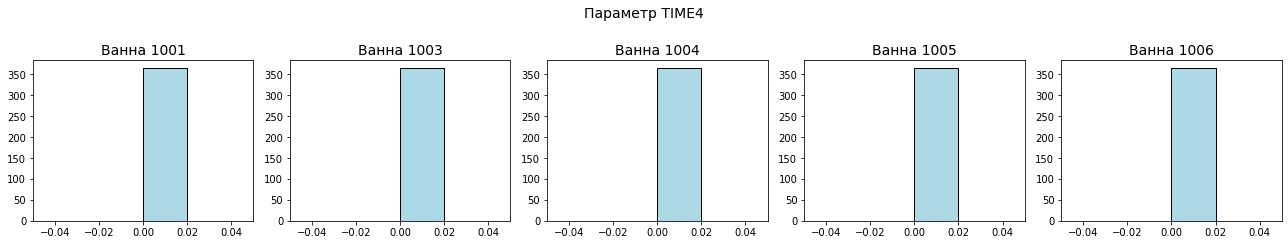

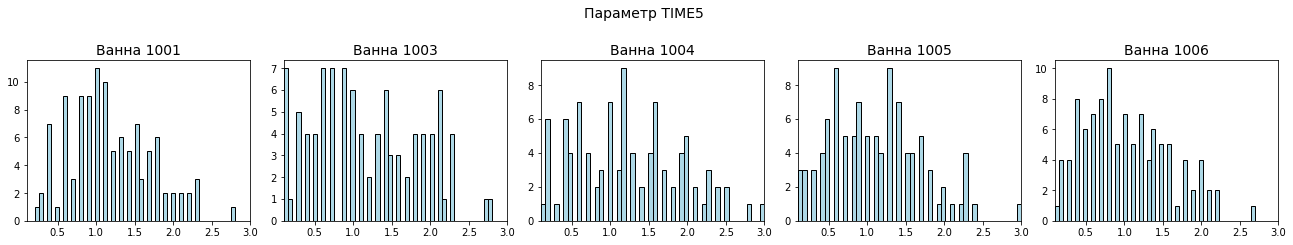

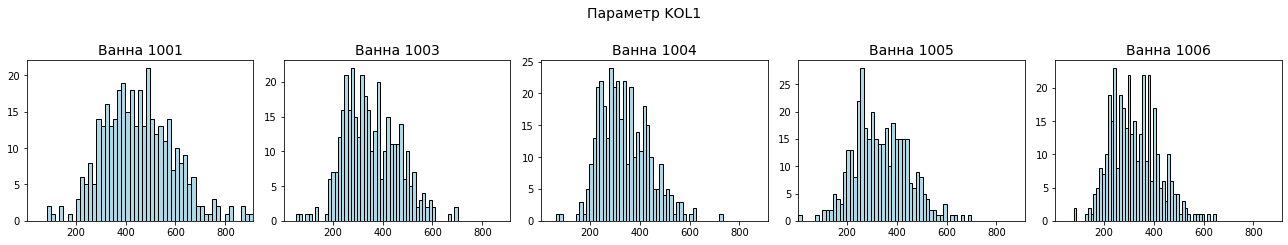

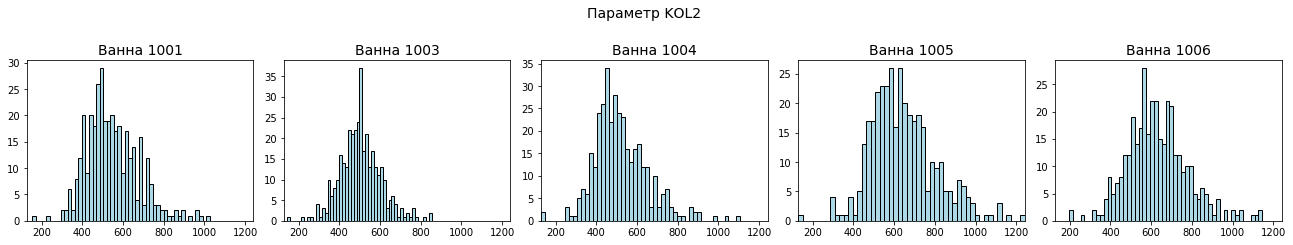

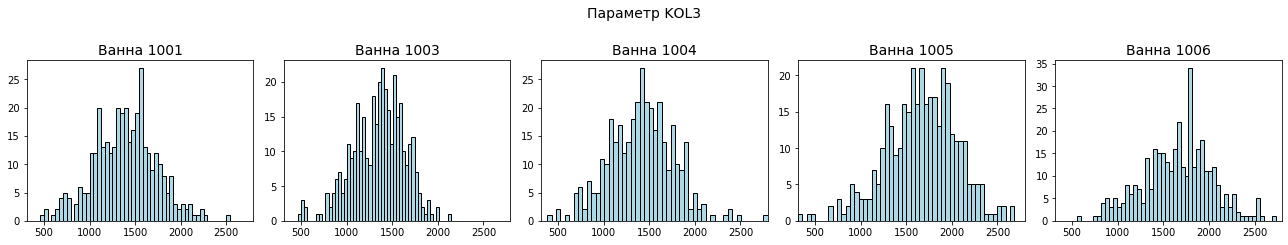

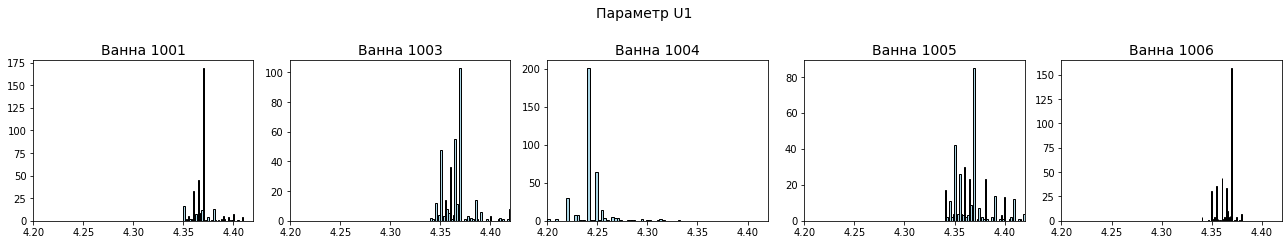

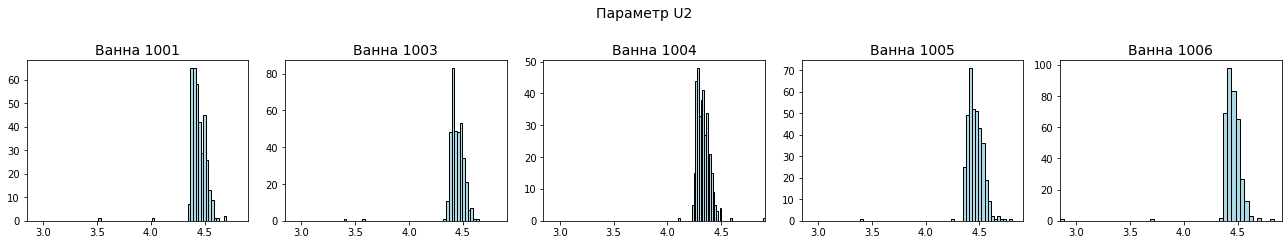

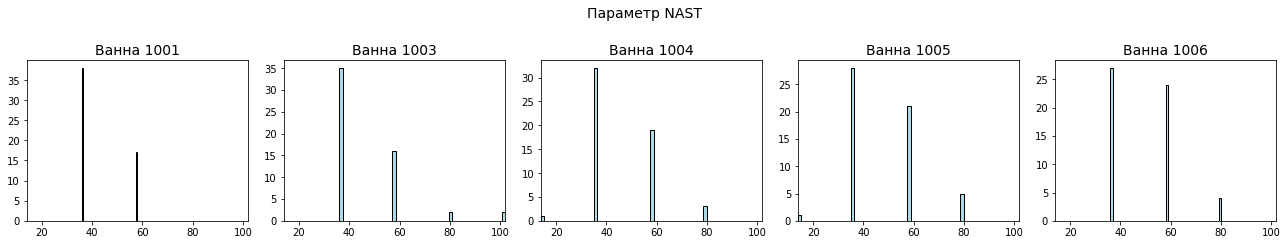

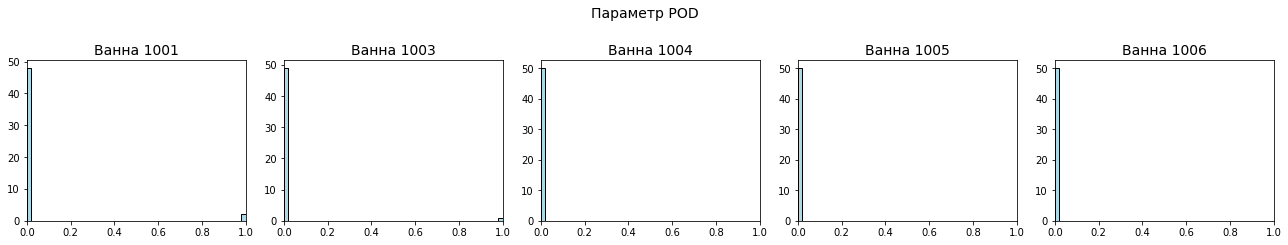

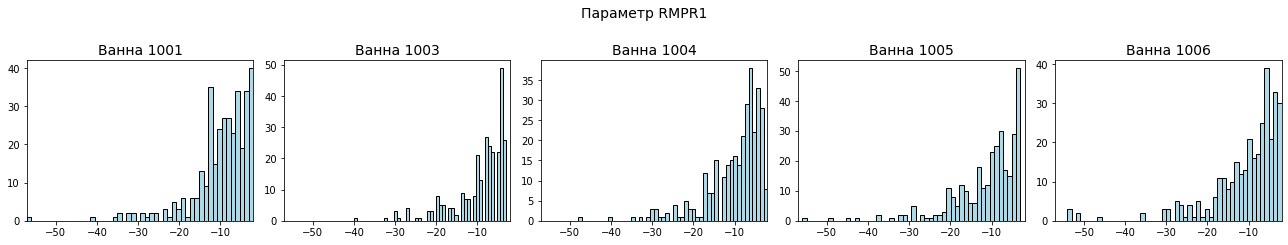

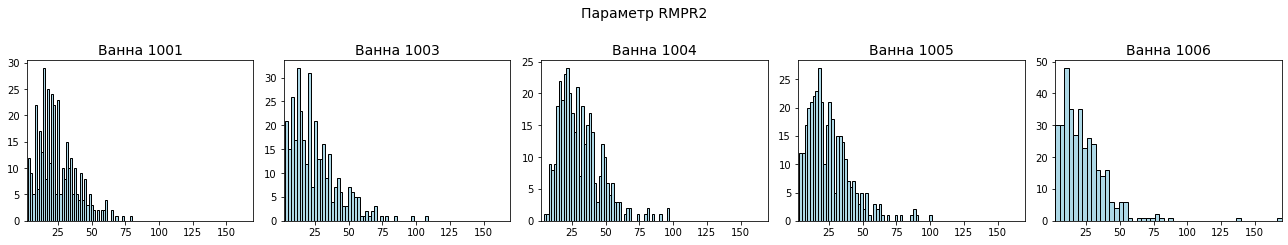

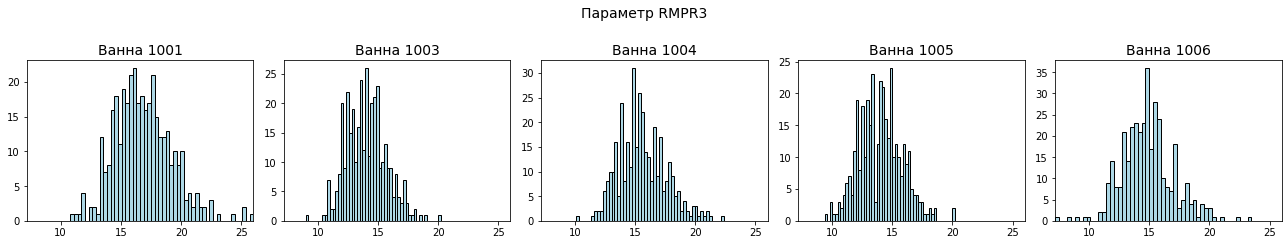

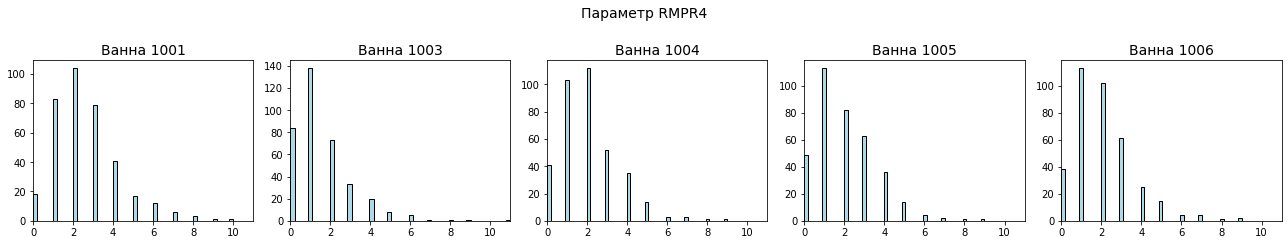

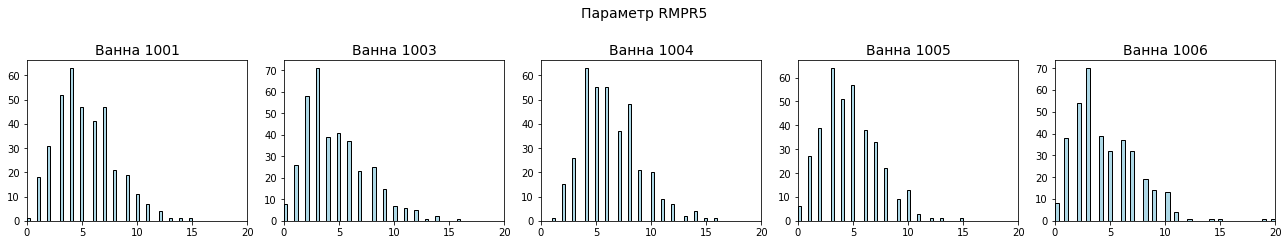

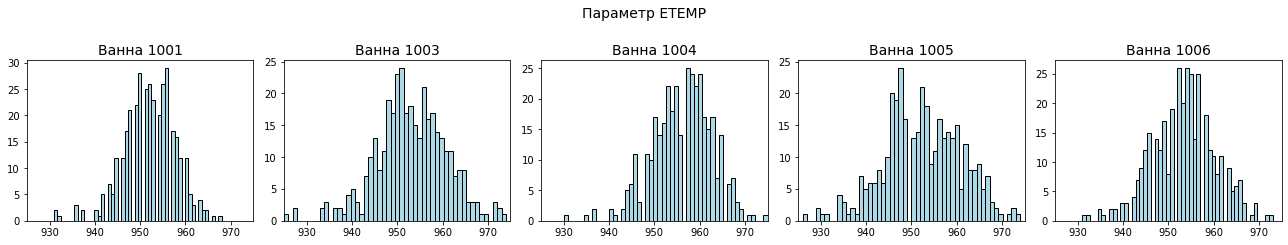

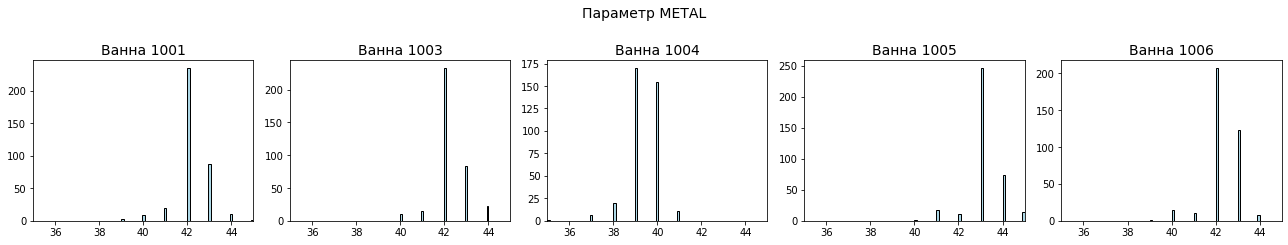

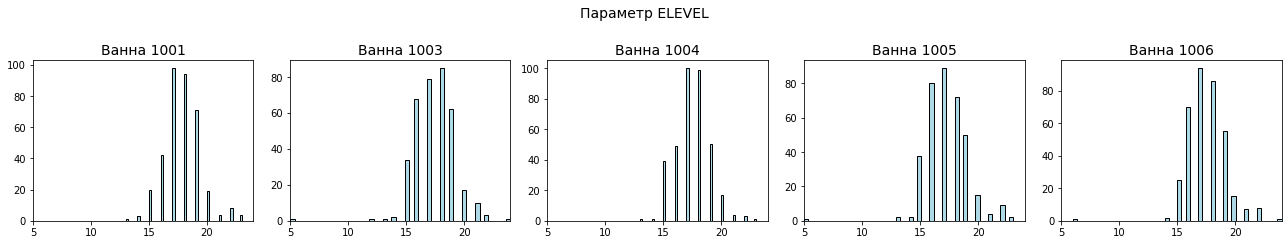

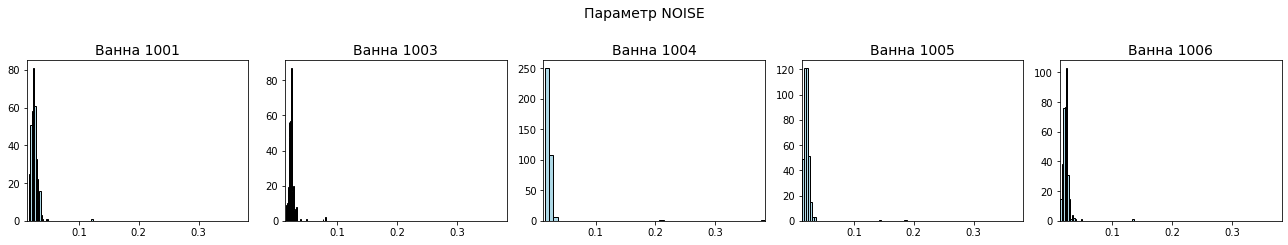

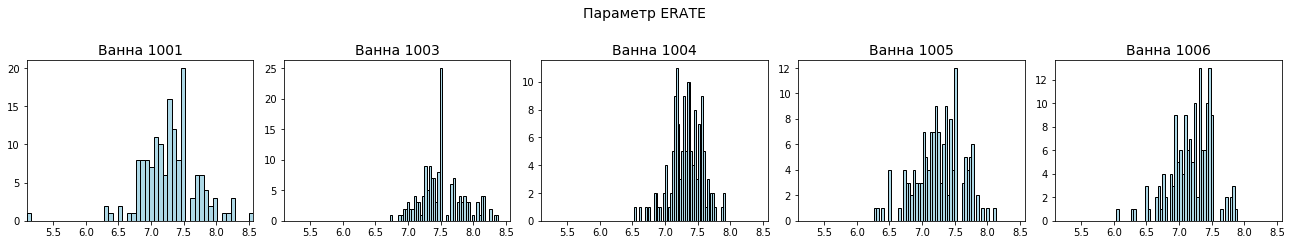

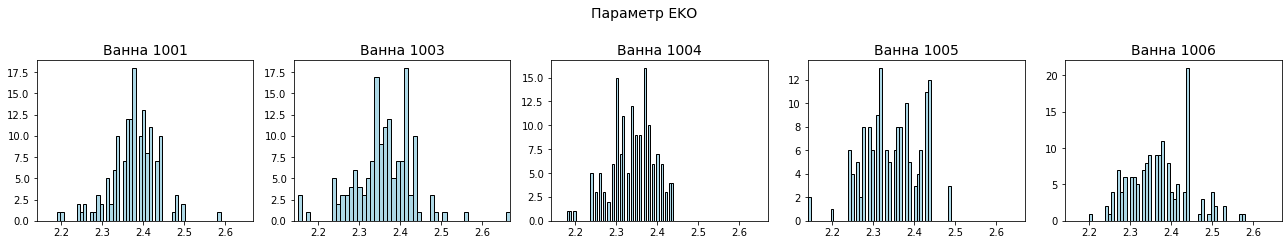

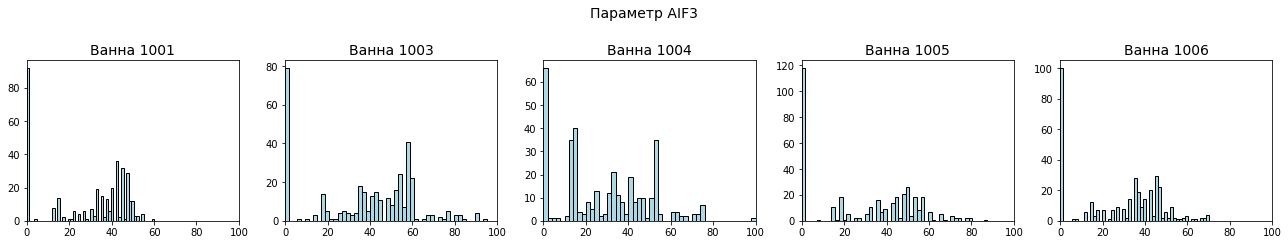

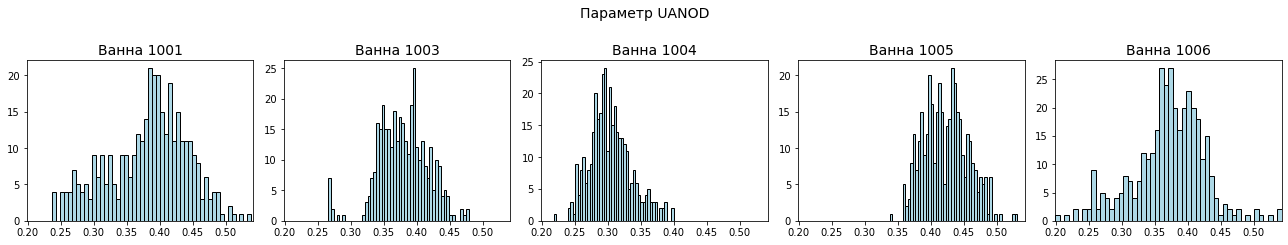

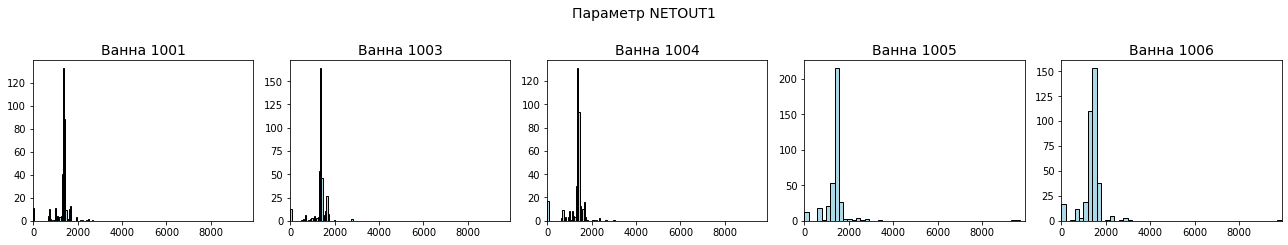

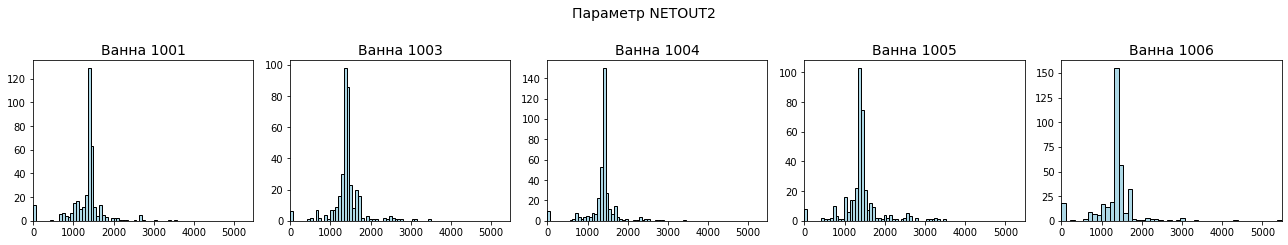

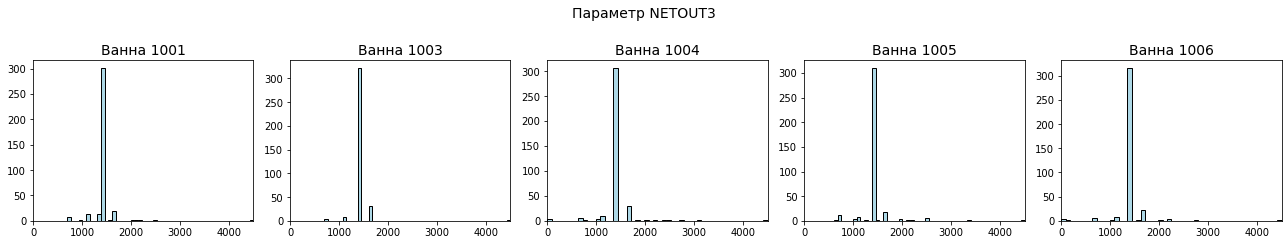

In [78]:
for param in paramNames:
    fig, axs = plt.subplots(ncols=5, figsize=(18,3))
    minArr=[]
    maxArr=[]
    for i in range(5):
        minArr.append( data[i][param].min() )
        maxArr.append( data[i][param].max() )
    for i in range(5):
        axs[i].hist(data[i][param], bins=50, ec='black', color='lightblue')
        axs[i].set_title('Ванна '+bathNumber[i], fontsize=14)
        axs[i].set_xlim(np.min(minArr),np.max(maxArr))
    fig.suptitle('Параметр '+param, y=1.12, fontsize=14)
    plt.tight_layout()
    plt.show()

<hr>

# диапазоны изменения параметров

In [98]:
minValues=pd.DataFrame()
maxValues=pd.DataFrame()
for i in range(5):
    if i==0:
        minValues=data[i].describe().loc[['min']].copy().T
        minValues.columns.values[i]=bathNumber[i]  
        maxValues=data[i].describe().loc[['max']].copy().T
        maxValues.columns.values[i]=bathNumber[i]          
    else:
        minValues[bathNumber[i]]=data[i].describe().loc[['min']].T  
        maxValues[bathNumber[i]]=data[i].describe().loc[['max']].T  

In [97]:
minValues

1001     1003     1004     1005     1006
AE1        0.200    0.200    0.300    0.500    0.300
AE2        0.000    0.000    0.000    0.000    0.000
AE3       19.000   17.000   14.000   22.000   22.000
TIME1      1.400    0.000    2.300    0.200    0.000
TIME2      1.600    1.700    1.700    1.700    1.900
TIME3      2.500    2.500    2.200    1.400    0.000
TIME4      0.000    0.000    0.000    0.000    0.000
TIME5      0.200    0.100    0.100    0.100    0.100
KOL1      84.000   51.000   64.000    4.000   78.000
KOL2     154.000  142.000  128.000  130.000  196.000
KOL3     458.000  466.000  381.000  314.000  558.000
U1         4.350    4.340    4.200    4.340    4.340
U2         3.510    3.392    4.098    3.388    2.849
NAST      36.000   36.000   14.000   14.000   36.000
POD        0.000    0.000    0.000    0.000    0.000
RMPR1    -57.000  -40.000  -48.000  -56.000  -54.000
RMPR2      3.000    3.000    4.000    3.000    2.000
RMPR3     10.800    9.000   10.100    9.400    7.200
RMPR4      0.000    0.000    0.000    0.000    0.000
RMPR5      0.000    0.000    1.000    0.000    0.000
ETEMP    931.000  925.000  930.000  926.000  931.000
METAL     39.000   40.000   35.000   40.000   39.000
ELEVEL    13.000    5.000   13.000    5.000    6.000
NOISE      0.017    0.015    0.015    0.013    0.013
ERATE      5.100    6.720    6.520    6.260    6.040
EKO        2.190    2.150    2.180    2.140    2.200
AIF3       0.000    0.000    0.000    0.000    0.000
UANOD      0.237    0.266    0.218    0.338    0.199
NETOUT1    0.000    0.000    0.000    0.000    0.000
NETOUT2    0.000    0.000    0.000    0.000    0.000
NETOUT3  700.000  690.000    0.000  600.000    0.000

In [99]:
maxValues

1001      1003      1004      1005      1006
AE1         6.400     5.200     6.000     4.200     4.200
AE2         5.000     8.000     7.000     8.000     8.000
AE3        95.000    68.000    88.000    85.000    94.000
TIME1      17.100    16.500    15.800    15.500    16.400
TIME2       9.000    10.100     9.500     9.200     9.900
TIME3      10.700    11.300    11.100    11.300    11.600
TIME4       0.000     0.000     0.000     0.000     0.000
TIME5       2.800     2.800     3.000     3.000     2.700
KOL1      913.000   701.000   733.000   698.000   649.000
KOL2     1026.000   856.000  1108.000  1241.000  1146.000
KOL3     2542.000  2149.000  2797.000  2686.000  2733.000
U1          4.410     4.420     4.333     4.420     4.380
U2          4.702     4.645     4.907     4.801     4.839
NAST       58.000   102.000    80.000    80.000    80.000
POD         1.000     1.000     0.000     0.000     0.000
RMPR1      -2.000    -3.000    -2.000    -3.000    -2.000
RMPR2      80.000   109.000    97.000   101.000   170.000
RMPR3      26.000    20.200    22.400    20.200    23.500
RMPR4      10.000    11.000     9.000     9.000     9.000
RMPR5      15.000    16.000    16.000    15.000    20.000
ETEMP     968.000   974.000   975.000   974.000   973.000
METAL      45.000    44.000    41.000    45.000    44.000
ELEVEL     23.000    24.000    23.000    23.000    24.000
NOISE       0.123     0.081     0.383     0.188     0.136
ERATE       8.570     8.380     7.920     8.130     7.890
EKO         2.590     2.670     2.440     2.490     2.580
AIF3       60.000    95.000   100.000    87.500    70.000
UANOD       0.539     0.479     0.400     0.531     0.542
NETOUT1  2690.000  2810.000  3040.000  9700.000  9920.000
NETOUT2  3570.000  3510.000  3450.000  3520.000  5480.000
NETOUT3  4500.000  4500.000  4500.000  4500.000  4500.000

<hr>

In [117]:
# Анализ коэффициентов корреляции между входными параметрами и выходными (ETEMP, EKO)
corrETEMP=[]
corrEKO=[]
for i in range(5):
    corrETEMP.append(data[i].drop(columns=['ETEMP', 'EKO']).corrwith(data[i]['ETEMP']))
    corrEKO.append(data[i].drop(columns=['ETEMP', 'EKO']).corrwith(data[i]['EKO']))

In [177]:
for i in range(5):
    print("Очень сильные корреляции в наборе ", bathNumber[i])
    print('Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :')
    tmp=corrEKO[i][ (corrEKO[i]<=-0.80) | (corrEKO[i]>=0.80) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :')
    tmp=corrETEMP[i][ (corrETEMP[i]<=-0.80) | (corrETEMP[i]>=0.80) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('\n')

Очень сильные корреляции в наборе  1001
Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :
нет корреляций


Очень сильные корреляции в наборе  1003
Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :
нет корреляций


Очень сильные корреляции в наборе  1004
Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :
нет корреляций


Очень сильные корреляции в наборе  1005
Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :
нет корреляций


Очень сильные корреляции в наборе  1006
Коэффициент корреляции Пирсона для EKO |p| >= 0.80 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.80 :
нет корреляций




In [179]:
for i in range(5):
    print("Сильные корреляции в наборе ", bathNumber[i])
    print('Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.8)&(corrEKO[i]<=-0.6)) | ((corrEKO[i]>=0.6)&(corrEKO[i]<0.8)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.8)&(corrETEMP[i]<=-0.6)) | ((corrETEMP[i]>=0.6)&(corrETEMP[i]<0.8)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('\n')

Сильные корреляции в наборе  1001
Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :
нет корреляций


Сильные корреляции в наборе  1003
Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :
AIF3    0.68026
dtype: float64


Сильные корреляции в наборе  1004
Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :
нет корреляций


Сильные корреляции в наборе  1005
Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :
AIF3    0.697338
dtype: float64


Сильные корреляции в наборе  1006
Коэффициент корреляции Пирсона для EKO |p| >= 0.6 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.6 :
AIF3    0.645192
dtype: float64




In [180]:
for i in range(5):
    print("Средние корреляции в наборе ", bathNumber[i])
    print('Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.60)&(corrEKO[i]<=-0.4)) | ((corrEKO[i]>=0.4)&(corrEKO[i]<0.6))  ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('Коэффициент корреляции Пирсона для ETEMP |p| >= 0.4 :')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.6)&(corrETEMP[i]<=-0.4)) | ((corrETEMP[i]>=0.4)&(corrETEMP[i]<0.6)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('\n')

Средние корреляции в наборе  1001
Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :
нет корреляций
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.4 :
AIF3    0.488006
dtype: float64


Средние корреляции в наборе  1003
Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :
AIF3    0.567407
dtype: float64
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.4 :
U1      -0.419182
RMPR3   -0.405996
dtype: float64


Средние корреляции в наборе  1004
Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :
AIF3    0.44919
dtype: float64
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.4 :
AIF3    0.428792
dtype: float64


Средние корреляции в наборе  1005
Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :
RMPR3   -0.417545
AIF3     0.556544
dtype: float64
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.4 :
U1      -0.404672
RMPR3   -0.417291
dtype: float64


Средние корреляции в наборе  1006
Коэффициент корреляции Пирсона для EKO |p| >= 0.4 :
нет корреляций
Коэффициент корреляции Пирсона для E

In [181]:
for i in range(5):
    print("Слабые корреляции в наборе ", bathNumber[i])
    print('Коэффициент корреляции Пирсона для EKO |p| >= 0.2 :')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.4)&(corrEKO[i]<=-0.2)) | ((corrEKO[i]>=0.2)&(corrEKO[i]<0.4))  ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('Коэффициент корреляции Пирсона для ETEMP |p| >= 0.2 :')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.4)&(corrETEMP[i]<=-0.2)) | ((corrETEMP[i]>=0.2)&(corrETEMP[i]<0.4)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        print(tmp)
    print('\n')

Слабые корреляции в наборе  1001
Коэффициент корреляции Пирсона для EKO |p| >= 0.2 :
TIME1    0.327567
TIME2   -0.349191
TIME3   -0.268437
KOL1     0.310634
METAL   -0.202220
AIF3     0.332306
dtype: float64
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.2 :
AE1     -0.204933
TIME1    0.313529
TIME2   -0.272099
U1      -0.239830
METAL   -0.287479
dtype: float64


Слабые корреляции в наборе  1003
Коэффициент корреляции Пирсона для EKO |p| >= 0.2 :
AE1      -0.229708
AE3       0.334859
TIME1     0.229089
KOL3     -0.298219
U1       -0.242355
RMPR1     0.219679
RMPR3    -0.306647
RMPR4    -0.214634
ELEVEL   -0.226381
ERATE    -0.309812
UANOD    -0.224501
dtype: float64
Коэффициент корреляции Пирсона для ETEMP |p| >= 0.2 :
AE3        0.205263
TIME1      0.291939
TIME2     -0.200449
KOL2      -0.234041
KOL3      -0.239882
RMPR1      0.225447
RMPR4     -0.294223
ELEVEL    -0.208395
NOISE     -0.320179
ERATE     -0.283364
UANOD     -0.273059
NETOUT3   -0.223868
dtype: float64


Слабые корр

## Уберем записи или столбцы с пропусками

In [186]:
dropNanValues=data[0].copy()

In [205]:
dropNanValuesRowsEKO=dropNanValues.drop(columns=['ETEMP'])
dropNanValuesRowsEKO=dropNanValuesRowsEKO.dropna(axis=0)
dropNanValuesRowsEKO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 29 to 323
Data columns (total 30 columns):
AE1        12 non-null float64
AE2        12 non-null int64
AE3        12 non-null float64
TIME1      12 non-null float64
TIME2      12 non-null float64
TIME3      12 non-null float64
TIME4      12 non-null int64
TIME5      12 non-null float64
KOL1       12 non-null int64
KOL2       12 non-null int64
KOL3       12 non-null int64
U1         12 non-null float64
U2         12 non-null float64
NAST       12 non-null float64
POD        12 non-null float64
RMPR1      12 non-null float64
RMPR2      12 non-null float64
RMPR3      12 non-null float64
RMPR4      12 non-null int64
RMPR5      12 non-null int64
METAL      12 non-null float64
ELEVEL     12 non-null float64
NOISE      12 non-null float64
ERATE      12 non-null float64
EKO        12 non-null float64
AIF3       12 non-null float64
UANOD      12 non-null float64
NETOUT1    12 non-null int64
NETOUT2    12 non-null int64
NETOUT3    12 

In [206]:
dropNanValuesRowsETEMP=dropNanValues.drop(columns=['EKO'])
dropNanValuesRowsETEMP=dropNanValuesRowsETEMP.dropna(axis=0)
dropNanValuesRowsETEMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 29 to 323
Data columns (total 30 columns):
AE1        12 non-null float64
AE2        12 non-null int64
AE3        12 non-null float64
TIME1      12 non-null float64
TIME2      12 non-null float64
TIME3      12 non-null float64
TIME4      12 non-null int64
TIME5      12 non-null float64
KOL1       12 non-null int64
KOL2       12 non-null int64
KOL3       12 non-null int64
U1         12 non-null float64
U2         12 non-null float64
NAST       12 non-null float64
POD        12 non-null float64
RMPR1      12 non-null float64
RMPR2      12 non-null float64
RMPR3      12 non-null float64
RMPR4      12 non-null int64
RMPR5      12 non-null int64
ETEMP      12 non-null float64
METAL      12 non-null float64
ELEVEL     12 non-null float64
NOISE      12 non-null float64
ERATE      12 non-null float64
AIF3       12 non-null float64
UANOD      12 non-null float64
NETOUT1    12 non-null int64
NETOUT2    12 non-null int64
NETOUT3    12 

In [188]:
dropNanValuesColumns=dropNanValues.dropna(axis=1)
dropNanValuesColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 18 columns):
AE2        365 non-null int64
TIME1      365 non-null float64
TIME2      365 non-null float64
TIME3      365 non-null float64
TIME4      365 non-null int64
KOL1       365 non-null int64
KOL2       365 non-null int64
KOL3       365 non-null int64
U1         365 non-null float64
U2         365 non-null float64
RMPR3      365 non-null float64
RMPR4      365 non-null int64
RMPR5      365 non-null int64
NOISE      365 non-null float64
UANOD      365 non-null float64
NETOUT1    365 non-null int64
NETOUT2    365 non-null int64
NETOUT3    365 non-null int64
dtypes: float64(8), int64(10)
memory usage: 51.5 KB


## Если удалить неполные столбцы, остается всего 18 параметров из 30, неполными являются также целевые показатели.
## Если удалять записи, оталется 12 наблюдений из 365.
## Выводы. Требуется заполнять пропуски.

<hr>

# Анализ целевых параметров

In [169]:
dataEKO=[]
dataETEMP=[]
for i in range(5):
    dataEKO.append(data[i]['EKO'])
    dataETEMP.append(data[i]['ETEMP'])

In [170]:
dataEKO=pd.DataFrame(dataEKO).T
dataEKO.columns=bathNumber
dataETEMP=pd.DataFrame(dataETEMP).T
dataETEMP.columns=bathNumber

In [171]:
dataEKO.describe()

1001        1003        1004        1005        1006
count  152.000000  153.000000  151.000000  151.000000  155.000000
mean     2.376250    2.358693    2.339735    2.346225    2.371290
std      0.056437    0.071944    0.054295    0.067584    0.071973
min      2.190000    2.150000    2.180000    2.140000    2.200000
25%      2.350000    2.320000    2.300000    2.300000    2.320000
50%      2.380000    2.360000    2.340000    2.350000    2.370000
75%      2.410000    2.410000    2.380000    2.400000    2.430000
max      2.590000    2.670000    2.440000    2.490000    2.580000

In [172]:
dataETEMP.describe()

1001        1003        1004        1005        1006
count  364.000000  364.000000  364.000000  364.000000  364.000000
mean   952.046703  953.101648  956.057692  952.423077  953.392857
std      5.710221    7.932435    6.544568    8.507143    6.991301
min    931.000000  925.000000  930.000000  926.000000  931.000000
25%    949.000000  948.000000  952.000000  947.000000  949.000000
50%    952.000000  953.000000  957.000000  952.000000  954.000000
75%    956.000000  958.000000  960.250000  959.000000  958.000000
max    968.000000  974.000000  975.000000  974.000000  973.000000

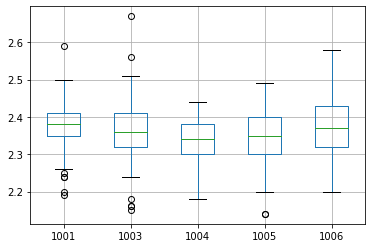

In [173]:
dataEKO.boxplot()

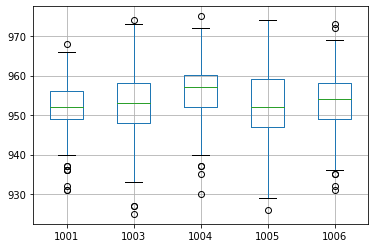

In [174]:
dataETEMP.boxplot()